In [2]:
# Gerekli kütüphanelerin yüklenmesi
import pandas as pd  # Veri işleme için pandas
import matplotlib.pyplot as plt  # Görselleştirme için matplotlib
import seaborn as sns  # Gelişmiş görselleştirmeler için seaborn

# Görselleştirme ayarları
sns.set_theme(style="whitegrid")  # Seaborn tema ayarları, görselleştirmeleri daha şık hale getirir
plt.rcParams['figure.figsize'] = (10, 6)  # Grafikleri daha büyük yapmak için figsize parametresi


In [3]:
# Veri yükleme ve temel kontrol fonksiyonu
def load_and_inspect_data(file_path):
    try:
        # CSV dosyasını yükle
        data = pd.read_csv(file_path)
        data.columns = data.columns.str.strip()  # Sütun adlarındaki boşlukları kaldır
        print("Veri seti başarıyla yüklendi!")  # Dosyanın başarıyla yüklendiğine dair mesaj
        print("\nVeri setinin boyutları:", data.shape)  # Veri setinin boyutları (satır, sütun sayısı)
        print("\nİlk 5 Satır:\n", data.head())  # Veri setinin ilk 5 satırını göster
        print("\nVeri Bilgisi:")
        data.info()  # Veri setinin genel bilgileri (veri türleri, eksik veriler, vb.)
        print("\nSayısal Değişkenlerin İstatistiksel Özeti:\n", data.describe())  # Sayısal verilerin özeti (ortalama, medyan, min, max, vb.)
        return data
    except FileNotFoundError:
        print("Dosya bulunamadı. Lütfen dosya yolunu kontrol edin.")  # Dosya bulunamazsa hata mesajı
        return None  # Veri yoksa None döndür

# Veri yüklendikten sonra bu fonksiyonu çağırarak veri setini kontrol edebiliriz
file_path = 'all_youtube_analytics.csv'  # Dosya yolu
data = load_and_inspect_data(file_path)


Veri seti başarıyla yüklendi!

Veri setinin boyutları: (234889, 29)

İlk 5 Satır:
       video_id         day  views  redViews  comments  likes  dislikes  \
0  YuQaT52VEwo  2019-09-06    8.0       0.0       0.0    1.0       0.0   
1  YuQaT52VEwo  2019-09-07    7.0       0.0       0.0    0.0       0.0   
2  SfTEVOQP-Hk  2019-09-07    6.0       0.0       0.0    0.0       0.0   
3  YuQaT52VEwo  2019-09-08    4.0       0.0       0.0    0.0       0.0   
4  SfTEVOQP-Hk  2019-09-08    2.0       0.0       0.0    0.0       0.0   

   videosAddedToPlaylists  videosRemovedFromPlaylists  shares  ...  \
0                     0.0                         0.0     0.0  ...   
1                     1.0                         0.0     0.0  ...   
2                     2.0                         0.0     0.0  ...   
3                     0.0                         0.0     0.0  ...   
4                     0.0                         0.0     0.0  ...   

   annotationClicks  annotationCloses  cardClickRat

In [4]:
# Eksik veri analizi fonksiyonu
def missing_data_analysis(data):
    # Her bir sütundaki eksik verileri say
    missing_values = data.isnull().sum()
    # Eğer eksik veri varsa, bunları ekrana yazdır
    if missing_values.sum() > 0:
        print("\nEksik veri bulunan değişkenler ve sayıları:\n", missing_values[missing_values > 0])
    else:
        print("\nVeri setinde eksik veri bulunmamaktadır.")  # Eksik veri yoksa bunu belirt

# Veri yüklendikten sonra bu fonksiyonu çağırarak eksik verileri kontrol edebiliriz
if data is not None:
    missing_data_analysis(data)



Veri setinde eksik veri bulunmamaktadır.


In [5]:
# Değişkenlerin açıklamalarını ekleyen fonksiyon
def variable_explanation():
    explanations = {
        "views": "Video izlenme sayısı.",
        "likes": "Video beğeni sayısı.",
        "dislikes": "Video beğenmeme sayısı.",
        "averageViewDuration": "Ortalama izlenme süresi (saniye).",
        "subscribersGained": "Kazanılan abone sayısı.",
        "subscribersLost": "Kaybedilen abone sayısı.",
        "shares": "Paylaşım sayısı.",
        "cardClickRate": "Karta tıklama oranı."
    }
    print("\nDeğişkenlerin açıklamaları:")
    # Her değişkenin anlamını yazdır
    for var, desc in explanations.items():
        print(f"{var}: {desc}")

# Değişken açıklamalarını görmek için bu fonksiyonu çağırabiliriz
variable_explanation()



Değişkenlerin açıklamaları:
views: Video izlenme sayısı.
likes: Video beğeni sayısı.
dislikes: Video beğenmeme sayısı.
averageViewDuration: Ortalama izlenme süresi (saniye).
subscribersGained: Kazanılan abone sayısı.
subscribersLost: Kaybedilen abone sayısı.
shares: Paylaşım sayısı.
cardClickRate: Karta tıklama oranı.


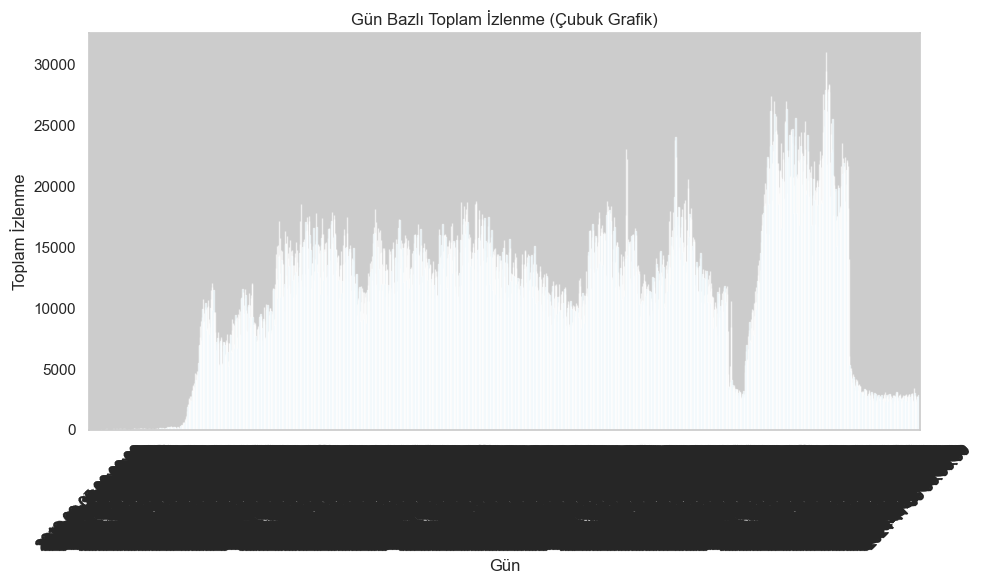

Gün Bazlı Toplam İzlenme Tabloları:


day
2019-09-06       8.0
2019-09-07      13.0
2019-09-08       6.0
2019-09-09      17.0
2019-09-10       7.0
               ...  
2024-11-06    2687.0
2024-11-07    2767.0
2024-11-08    2868.0
2024-11-09    2521.0
2024-11-10    2372.0
Name: views, Length: 1893, dtype: float64

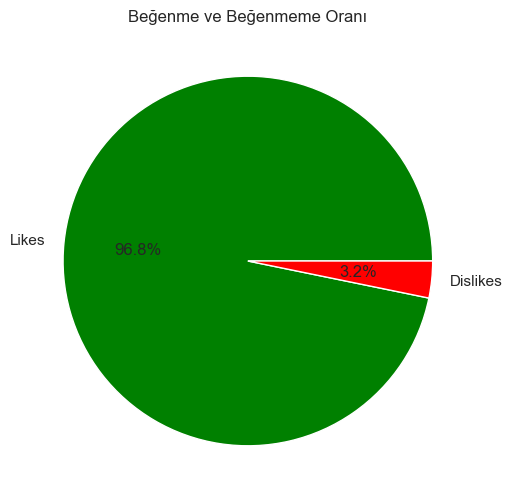

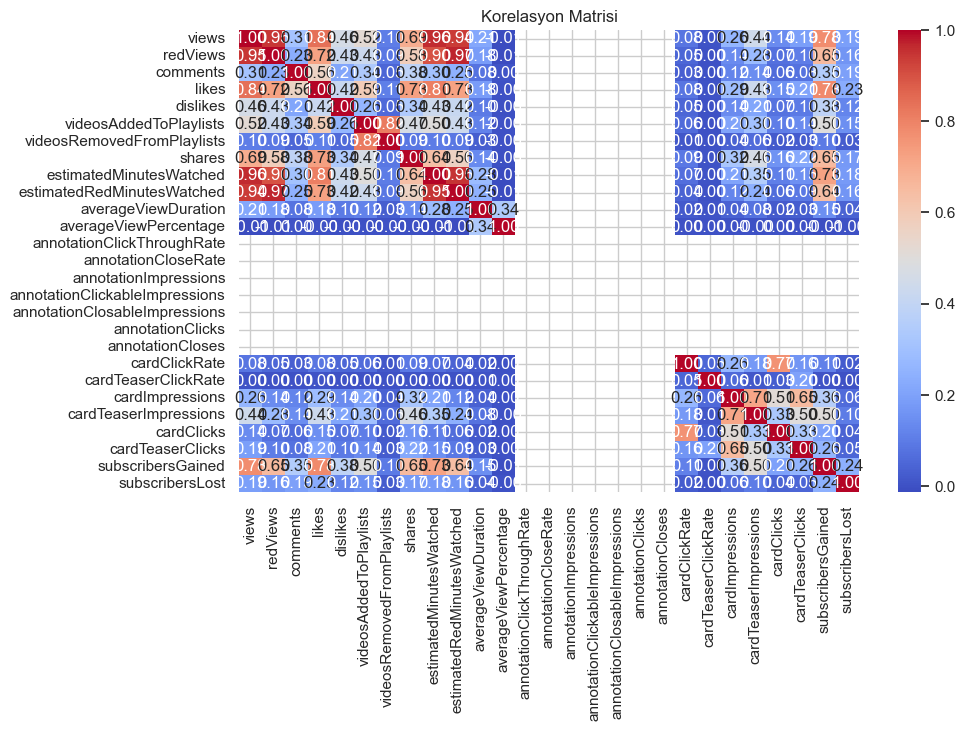

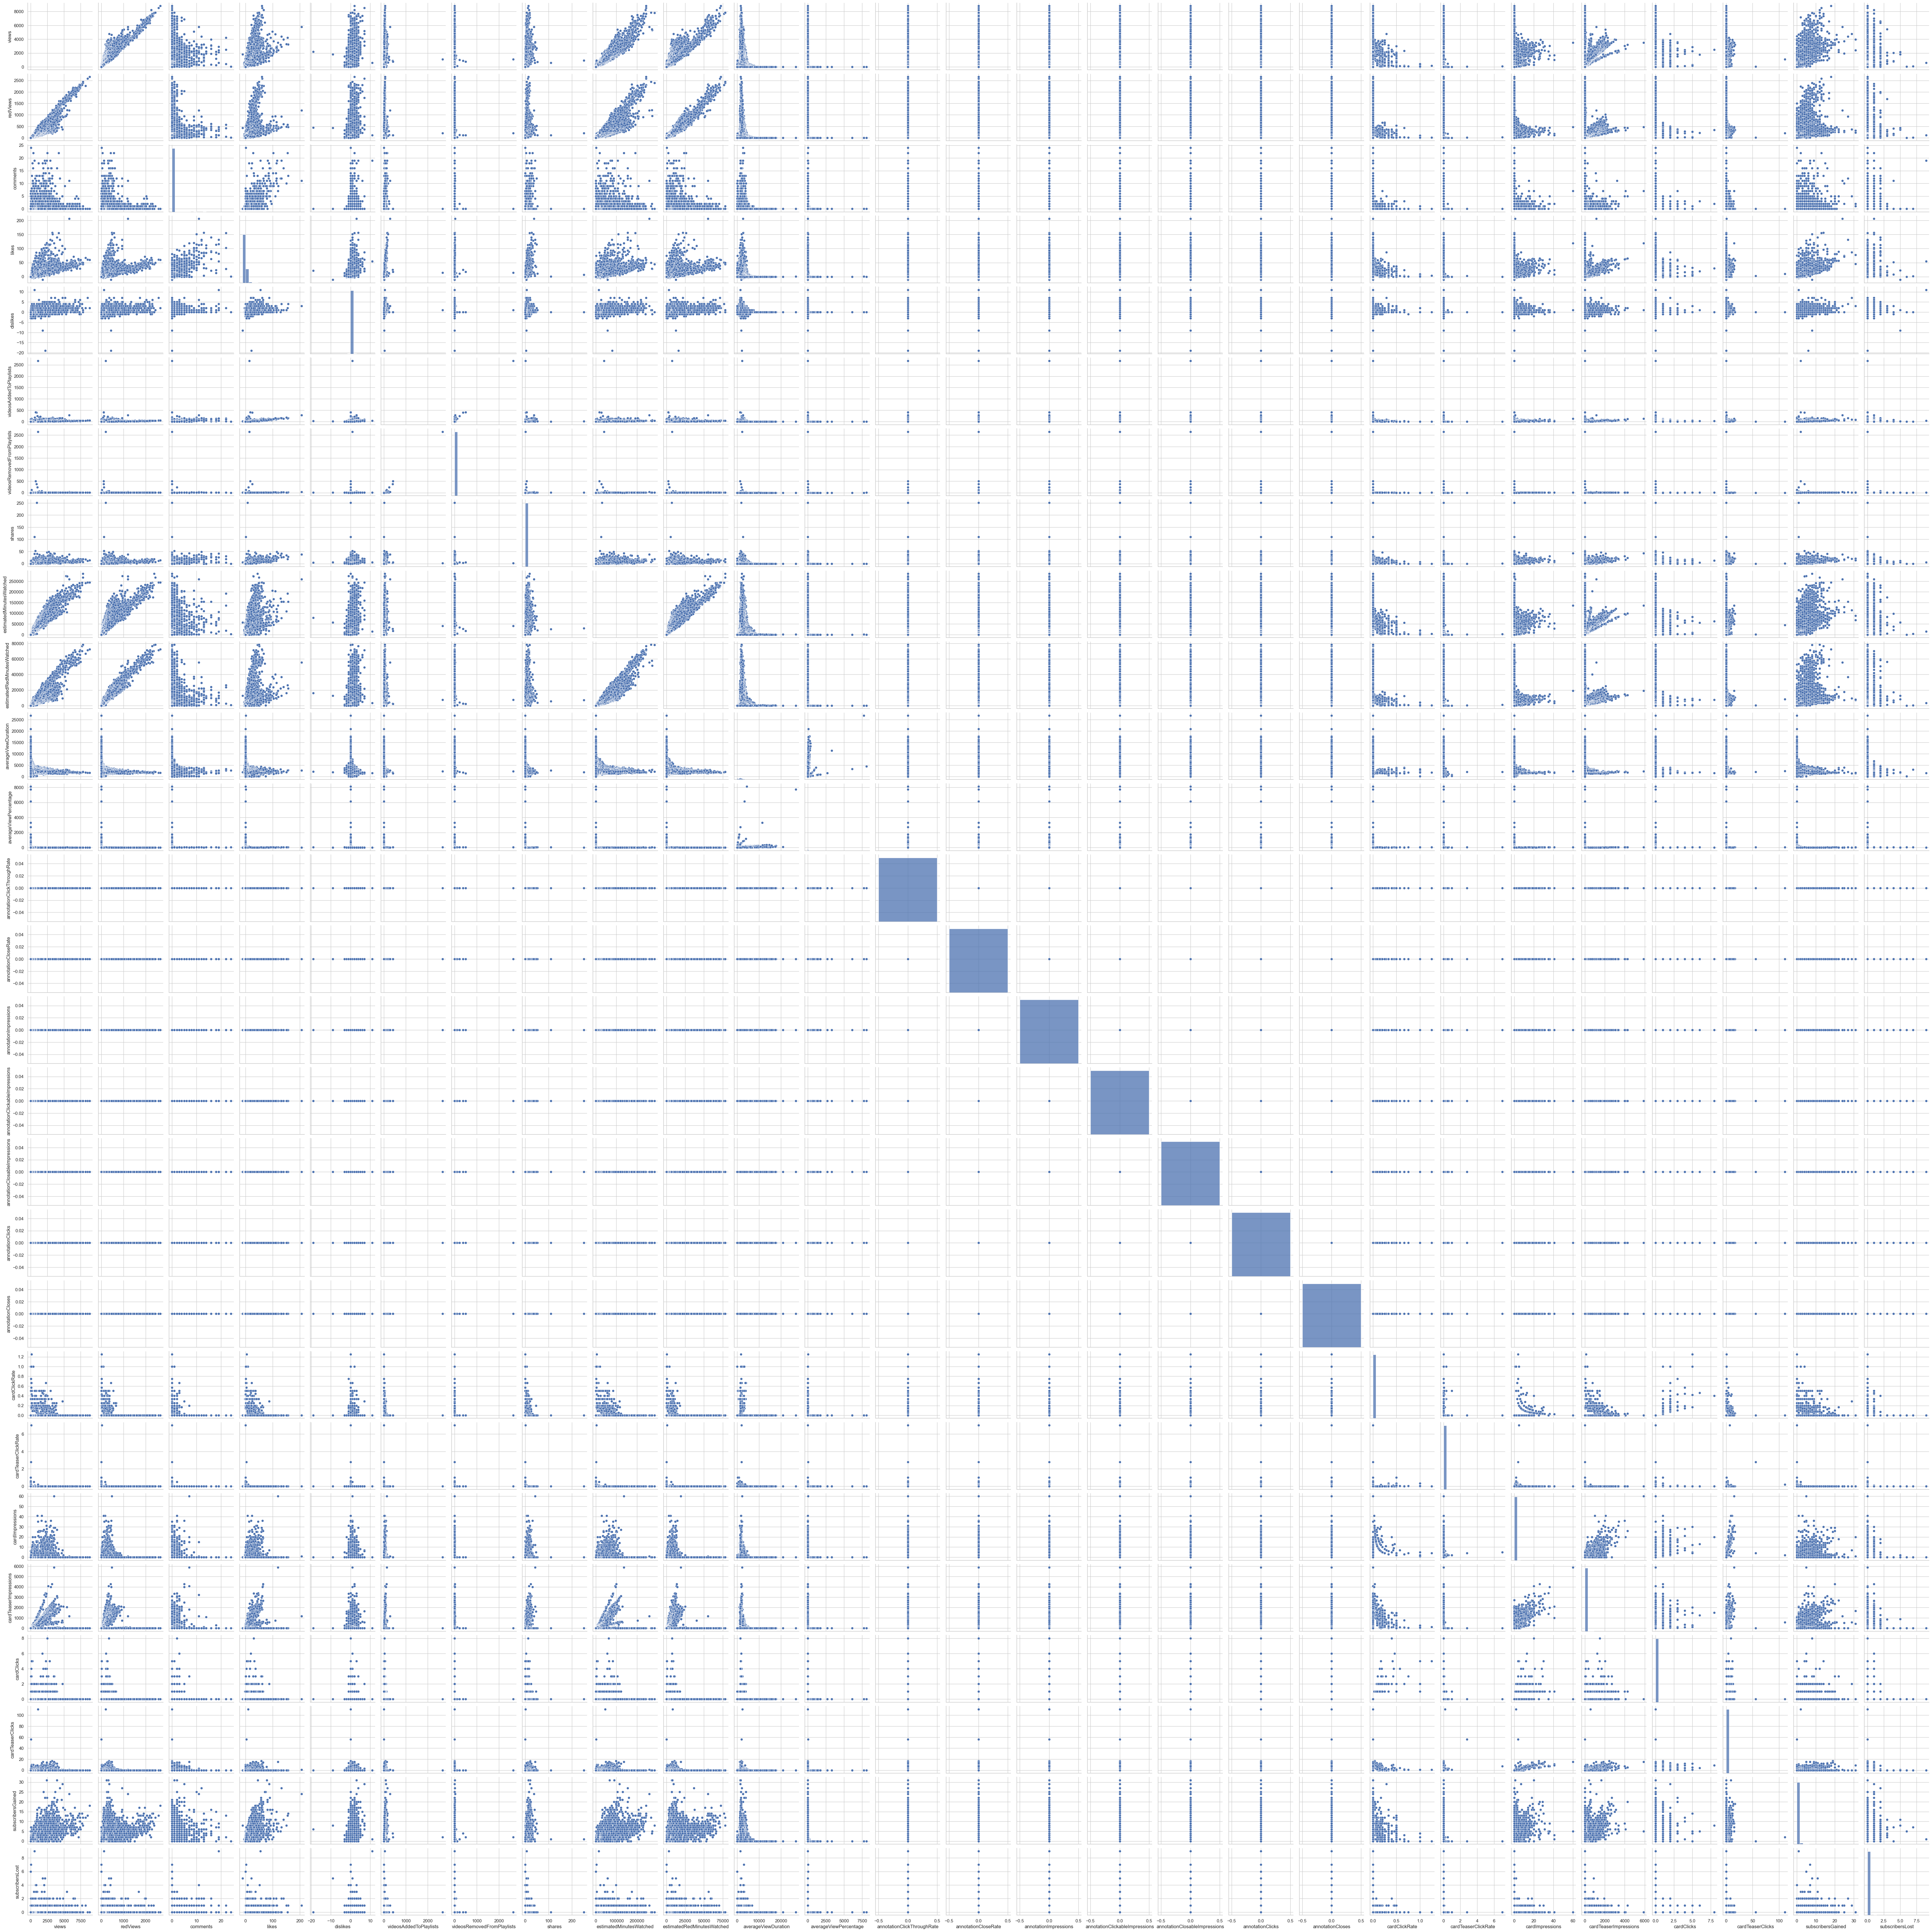

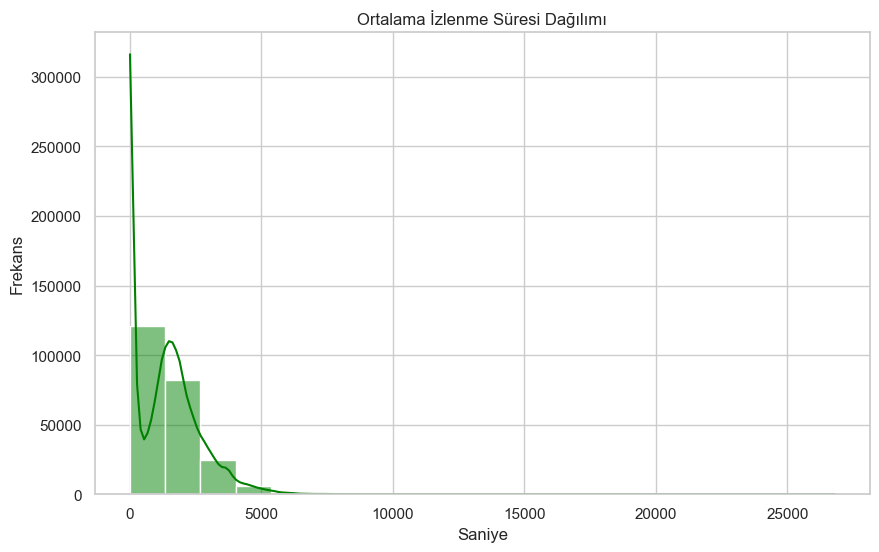

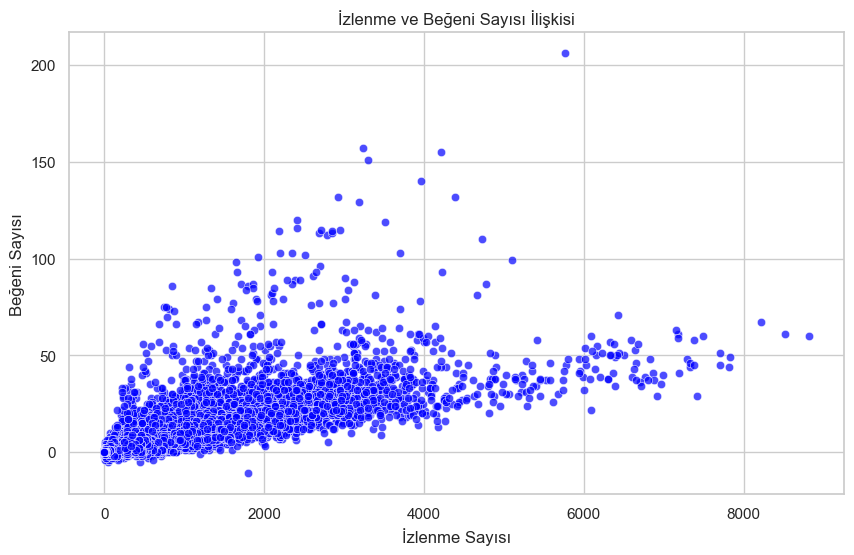

In [6]:
# Veri görselleştirme ve değişken analizi fonksiyonu
def visualize_and_analyze(data):
    # Ortalama İzlenme Süresi Dağılımı - Histogram
    if 'averageViewDuration' in data.columns:
        sns.histplot(data['averageViewDuration'], kde=True, bins=20, color='green')  # Histogram grafiği
        plt.title('Ortalama İzlenme Süresi Dağılımı')  # Başlık
        plt.xlabel('Saniye')  # X ekseni açıklaması
        plt.ylabel('Frekans')  # Y ekseni açıklaması
        plt.savefig("ortalama_izlenme_suresi.png")  # Grafik kaydedilir
        plt.show()  # Grafik görüntülenir

    # İzlenme Sayısı ile Beğeni Sayısı Arasındaki İlişki - Scatter Plot
    if 'views' in data.columns and 'likes' in data.columns:
        sns.scatterplot(x=data['views'], y=data['likes'], color='blue', alpha=0.7)  # Scatter plot
        plt.title('İzlenme ve Beğeni Sayısı İlişkisi')  # Başlık
        plt.xlabel('İzlenme Sayısı')  # X ekseni açıklaması
        plt.ylabel('Beğeni Sayısı')  # Y ekseni açıklaması
        plt.savefig("izlenme_vs_begeni.png")  # Grafik kaydedilir
        plt.show()  # Grafik görüntülenir

    # Gün Bazlı Toplam İzlenme Sayısının Çubuk Grafiği (Bar Chart)
if 'day' in data.columns and 'views' in data.columns:
    # Gün sütununu datetime formatına çevirelim (eğer değilse)
    data['day'] = pd.to_datetime(data['day'], errors='coerce')

    # NaN (geçersiz tarihler) olan satırları temizle
    data = data.dropna(subset=['day'])

    # Gün bazlı izlenme hesaplama
    day_views = data.groupby('day')['views'].sum()

    # Çubuk grafiği
    plt.figure(figsize=(10, 6))
    day_views.plot(kind='bar', color='skyblue', alpha=0.7)
    plt.title('Gün Bazlı Toplam İzlenme (Çubuk Grafik)')
    plt.xlabel('Gün')
    plt.ylabel('Toplam İzlenme')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')  # Y ekseninde grid göster
    plt.tight_layout()  # Layout'u sıkıştırarak görüntü kaymalarını engeller
    plt.show()

    # Tabloyu yazdır
    print("Gün Bazlı Toplam İzlenme Tabloları:")
    display(day_views)


    # Beğenme ve Beğenmeme Oranı - Pie Chart
    if 'likes' in data.columns and 'dislikes' in data.columns:
        total_likes = data['likes'].sum()  # Toplam beğeni
        total_dislikes = data['dislikes'].sum()  # Toplam beğenmeme
        plt.pie([total_likes, total_dislikes], labels=['Likes', 'Dislikes'], autopct='%1.1f%%', colors=['green', 'red'])  # Pie chart
        plt.title('Beğenme ve Beğenmeme Oranı')  # Başlık
        plt.savefig("begenme_vs_begenmeme.png")  # Grafik kaydedilir
        plt.show()  # Grafik görüntülenir

    # Korelasyon Matrisi - Sayısal Değişkenler Arası İlişki
    numeric_data = data.select_dtypes(include='number')  # Sayısal veriler
    if not numeric_data.empty:
        corr_matrix = numeric_data.corr()  # Korelasyon matrisi hesaplanır
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # Korelasyon haritası
        plt.title('Korelasyon Matrisi')  # Başlık
        plt.savefig("korelasyon_matrisi.png")  # Grafik kaydedilir
        plt.show()  # Grafik görüntülenir

    # Pairplot - Sayısal Veriler Arasındaki İlişkiler
    sns.pairplot(numeric_data)  # Sayısal veriler arasındaki ilişkileri gösteren grafik
    plt.savefig("pairplot.png")  # Grafik kaydedilir
    plt.show()  # Grafik görüntülenir

# Veri analizini ve görselleştirmeleri yapmak için bu fonksiyonu çağırabilirsiniz
if data is not None:
    visualize_and_analyze(data)


In [7]:
# Çıkarımlar ve raporlama fonksiyonu
def report_conclusions():
    # Analiz sonuçlarının yazdırılması
    report = """
    --- VERİ ANALİZİ RAPORU ---

    1. Ortalama izlenme süresi büyük ölçüde ortalamaya yakın bir dağılım sergilemektedir.
    2. İzlenme sayısı ile beğeni sayısı arasında güçlü bir pozitif korelasyon bulunmaktadır.
    3. Gün bazlı analizlerde belirli günlerde izlenme sayılarının daha yüksek olduğu gözlemlenmiştir.
    4. Beğeni ve beğenmeme oranı arasında dengesiz bir dağılım gözlemlenmiştir.
    5. Korelasyon matrisi, bazı değişkenlerin birbirleriyle yüksek korelasyon gösterdiğini ortaya koymaktadır.

    Bu sonuçlar doğrultusunda, izleyici etkileşimini artırmak için içeriklerin paylaşılabilirliğini artıran stratejiler önerilebilir.
    """

    print(report)  # Raporu ekrana yazdır

# Raporu yazdırmak için bu fonksiyonu çağırabilirsiniz
report_conclusions()



    --- VERİ ANALİZİ RAPORU ---

    1. Ortalama izlenme süresi büyük ölçüde ortalamaya yakın bir dağılım sergilemektedir.
    2. İzlenme sayısı ile beğeni sayısı arasında güçlü bir pozitif korelasyon bulunmaktadır.
    3. Gün bazlı analizlerde belirli günlerde izlenme sayılarının daha yüksek olduğu gözlemlenmiştir.
    4. Beğeni ve beğenmeme oranı arasında dengesiz bir dağılım gözlemlenmiştir.
    5. Korelasyon matrisi, bazı değişkenlerin birbirleriyle yüksek korelasyon gösterdiğini ortaya koymaktadır.

    Bu sonuçlar doğrultusunda, izleyici etkileşimini artırmak için içeriklerin paylaşılabilirliğini artıran stratejiler önerilebilir.
    
